In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy.stats as stats
#Path to CSV
final_df_csv = Path("final_df.csv")
final_df = pd.read_csv(final_df_csv)

In [6]:
final_df.dtypes

ZCTA5CE10                        int64
GEOID10                          int64
FreeEligible                   float64
ReducedEligible                float64
NotEligible                    float64
Free_Reduced_Eligible_Total    float64
Total_Students                 float64
PCT_Free                       float64
PCT_Reduced                    float64
PCT_FreeReduced                float64
CohortCnt                      float64
GradCnt                        float64
GradRate                       float64
MathNumAssessed                float64
AllSbjtNumAssessed             float64
EBRWNumAssessed                float64
MathNumReady                   float64
AllSbjtNumReady                float64
EBRWNumReady                   float64
FinalMathAveScore              float64
FinalAllSbjtAveScore           float64
FinalEWBRWAveScore             float64
MathPctReady                   float64
AllSbjtPctReady                float64
EBRWPctReady                   float64
count_ntm_stops          

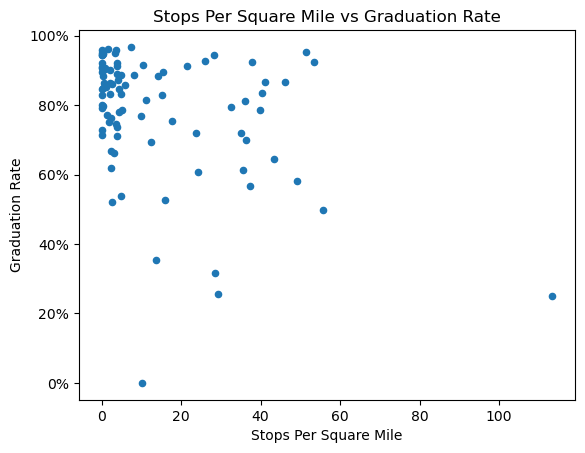

In [7]:
transport_grad = final_df.plot(kind="scatter",x="stops_per_sqmile",y="GradRate",grid=False,
                              xlabel="Stops Per Square Mile",
                              ylabel="Graduation Rate",
                              title="Stops Per Square Mile vs Graduation Rate")
transport_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))

In [8]:
#T-test
group1 = final_df["stops_per_sqmile"]
group2 = final_df["GradRate"]
stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=6.473798434376546, pvalue=5.453499927845358e-09, df=87.0155530953337)

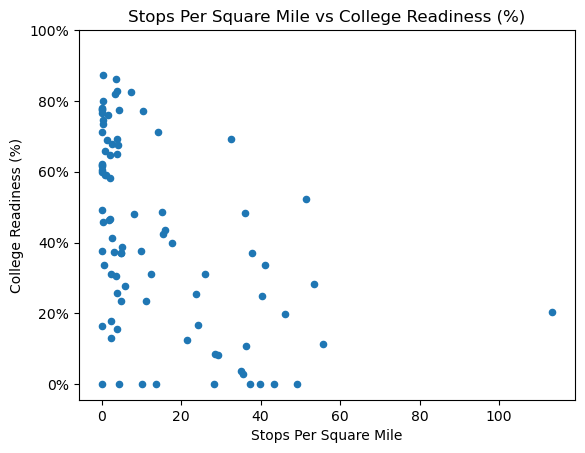

In [9]:
transport_readiness = final_df.plot(kind="scatter",x="stops_per_sqmile",y="EBRWPctReady",grid=False,
                                   xlabel="Stops Per Square Mile",
                                   ylabel="College Readiness (%)",
                                   title="Stops Per Square Mile vs College Readiness (%)")
transport_readiness.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))
transport_readiness.set_ylim(top=1)
plt.show()

In [10]:
#T-test
group1 = final_df["stops_per_sqmile"]
group2 = final_df["EBRWPctReady"]
stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=6.649688977979574, pvalue=2.4759861238487547e-09, df=87.03379499187002)

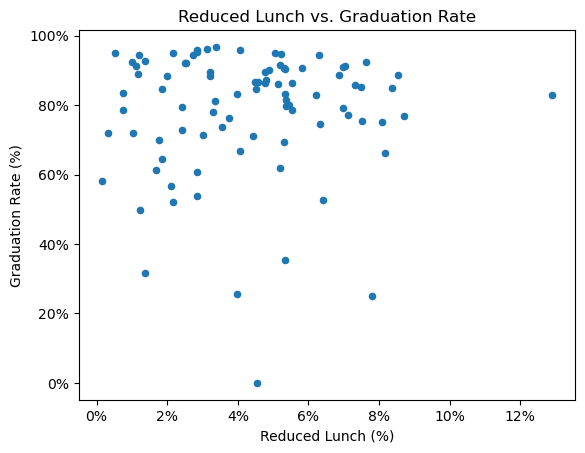

In [11]:
#Reduced Lunch vs. Grad Rate Scatter
reduced_grad = final_df.plot(kind="scatter", x="PCT_Reduced", y="GradRate", grid=False,
              xlabel="Reduced Lunch (%)",
              ylabel="Graduation Rate (%)",
              title="Reduced Lunch vs. Graduation Rate")
reduced_grad.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
reduced_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

In [12]:
#T-test
group1 = final_df["PCT_Reduced"]
group2 = final_df["GradRate"]
stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=-37.98131711655416, pvalue=3.048393619523344e-57, df=90.11916630837045)

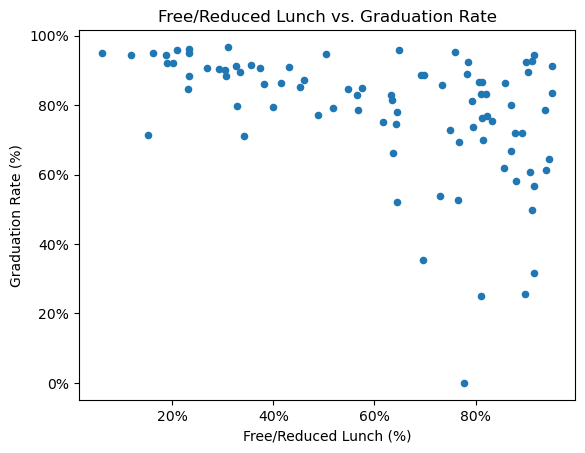

In [6]:
#Free and Reduced Lunch vs. Grad Rate Scatter
freereduced_grad = final_df.plot(kind="scatter", x="PCT_FreeReduced", y="GradRate", grid=False,
              xlabel="Free/Reduced Lunch (%)",
              ylabel="Graduation Rate (%)",
              title="Free/Reduced Lunch vs. Graduation Rate")
freereduced_grad.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
freereduced_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

In [13]:
#T-test
group1 = final_df["PCT_FreeReduced"]
group2 = final_df["GradRate"]
stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=-4.96029136356078, pvalue=1.8310079628586938e-06, df=155.07885863085912)

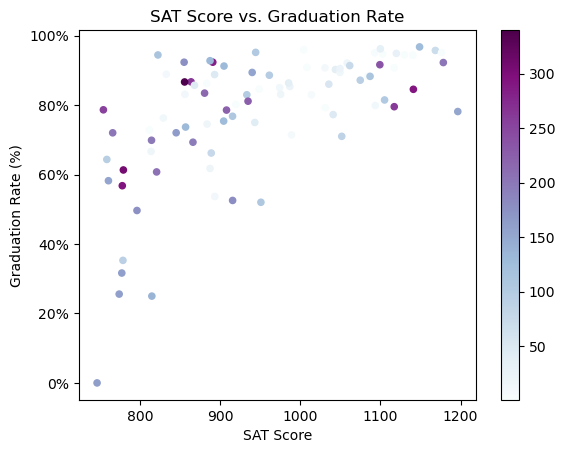

In [14]:
#SAT Scores vs. Grad Rate Scatter by Transit Stops
sat_grad = final_df.plot(kind="scatter",
                         x="FinalAllSbjtAveScore",
                         y="GradRate",
                         c=final_df["count_ntm_stops"],
                         colorbar=True,
                         cmap="BuPu",
                         grid=False,
                         xlabel="SAT Score",
                         ylabel="Graduation Rate (%)",
                         title="SAT Score vs. Graduation Rate")
clb = sat_grad.collections[0].colorbar
sat_grad.set_label("Number of Stops")
sat_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

In [15]:
#T-test
group1 = final_df["FinalAllSbjtAveScore"]
group2 = final_df["GradRate"]
stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=71.8046118615993, pvalue=3.1765021138994135e-79, df=87.00036875599035)

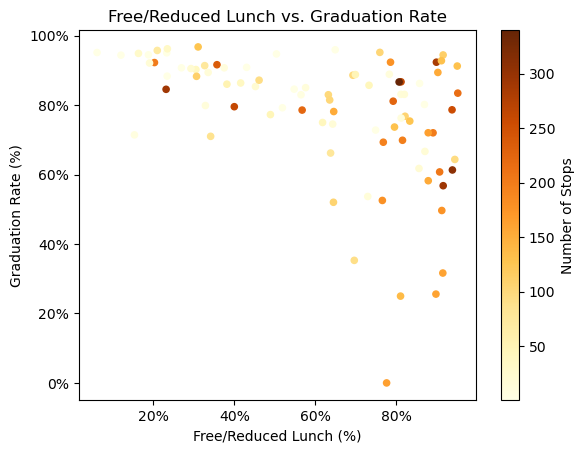

In [8]:
reduced_grad_by_stops = final_df.plot(kind="scatter",
                         x="PCT_FreeReduced",
                         y="GradRate",
                         c=final_df["count_ntm_stops"],
                         colorbar=True,
                         cmap="YlOrBr",
                         grid=False,
                         xlabel="Free/Reduced Lunch (%)",
                         ylabel="Graduation Rate (%)",
                         title="Free/Reduced Lunch vs. Graduation Rate")
clb = reduced_grad_by_stops.collections[0].colorbar
clb.set_label("Number of Stops")
reduced_grad_by_stops.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
reduced_grad_by_stops.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

In [16]:
#T-test
group1 = final_df["PCT_FreeReduced"]
group2 = final_df["GradRate"]
stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=-4.96029136356078, pvalue=1.8310079628586938e-06, df=155.07885863085912)